# Fábio Gonçalves
## Sprint #4 - Covid API Data
https://covid19-api.vost.pt/

**HTML_CODES**  
https://developer.mozilla.org/pt-BR/docs/Web/HTTP/Status


**Usage of**
* resquests
* pandas
* graphics
* functions
* widgets

**Objectives**
1. From COVID API import data using funcions and requests
1. Convert ```['confirmados_novos', 'internados', 'internados_uci']``` to pandas
1. Describe ```['confirmados_novos', 'internados', 'internados_uci']```
1. Make a Box plot of ``['confirmados_novos', 'internados', 'internados_uci']```
1. Make a evolution plot of confirmados_novos with moving average
1. Make a Widget version with selection dates and combo box
1. Make a summary conclusion

### from COVID API import data using funcions and requests
### Convert [‘confirmados_novos’, ‘internados’, ‘internados_uci’] to pandas

In [50]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from datetime import datetime
import ipywidgets as widgets
from ipywidgets import interact_manual, IntSlider, Select

# imputs do utilizador

data_inicio=input('Introduza a data inicial a pesquisar(formato dd-mm-yyyy?')
data_fim=input('Introduza a data final a pesquisar(formato dd-mm-yyyy?')
#import do data api

result = requests.get(f'https://covid19-api.vost.pt/Requests/get_entry/{data_inicio}_until_{data_fim}')

#verificar se import foi feito corretamente

if result.status_code==200:
    covdid=result.json()
else:
    print('Error fetching data')

#conversão do dados num dataframe
data_pack = ['confirmados_novos', 'internados', 'internados_uci']
datas = result.json()['data'].values()
dict_ = {}
for el in data_pack:
    dict_[el] =result.json()[(el)].values()
    df = pd.DataFrame(dict_ , datas)
    df.index=pd.to_datetime(df.index,format='%d-%m-%Y')
    df['avg_confirmados_novos'] = round(df['confirmados_novos'].rolling(window=3).mean(),2)

#Print tabela de casos covid entre datas
df

,confirmados_novos,internados,internados_uci,avg_confirmados_novos
2020-05-05,178,818.0,134.0,NaN
2020-05-06,480,838.0,136.0,NaN
2020-05-07,533,874.0,135.0,397.00
2020-05-08,553,842.0,127.0,522.00
2020-05-09,138,815.0,120.0,408.00
...,...,...,...,...
2021-05-27,572,233.0,53.0,513.67
2021-05-28,598,246.0,52.0,588.00
2021-05-29,609,244.0,49.0,593.00
2021-05-30,445,271.0,54.0,550.67


### Describe [‘confirmados_novos’, ‘internados’, ‘internados_uci’]

In [51]:
# imprimo o Describe
round(df.describe(),2)

,confirmados_novos,internados,internados_uci,avg_confirmados_novos
count,392.00,392.00,392.00,390.00
mean,2100.94,1580.98,247.19,2109.88
std,3068.48,1706.10,242.35,2998.37
min,98.00,207.00,29.00,123.67
25%,313.00,416.75,67.00,325.08
50%,566.50,628.50,112.50,563.00
75%,2866.75,2814.50,483.00,3146.75
max,16432.00,6869.00,904.00,14901.67


Text(0.5, 0, 'Data')

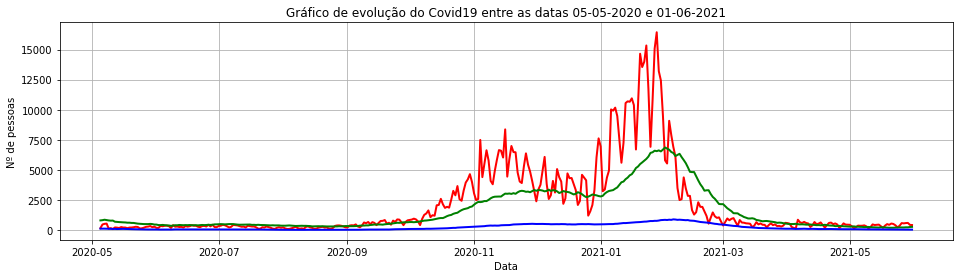

In [53]:
#plot dos resultados acima
plt.figure(figsize=(16,4))
plt.plot(df['confirmados_novos'],'r',linewidth=2, label='confirmados_novos')
plt.plot(df['internados'],'g',linewidth=2, label='internados')
plt.plot(df['internados_uci'],'b',linewidth=2, label='internados_uci')
plt.grid()
plt.title(f'Gráfico de evolução do Covid19 entre as datas {data_inicio} e {data_fim}')
plt.ylabel('Nº de pessoas')
plt.xlabel('Data')

### Make a Box plot of [‘confirmados_novos’, ‘internados’, ‘internados_uci’]

Text(0.5, 1.0, 'Casos Covid19 entre as datas 05-05-2020 e 01-06-2021')

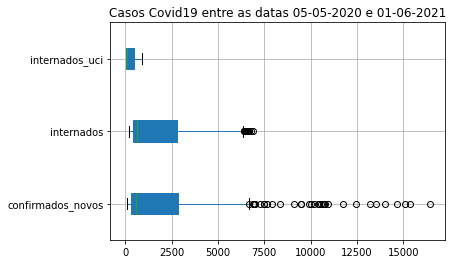

In [56]:
#boxplot dos resultdos acima
df.boxplot(data_pack, patch_artist=True,vert=False)
plt.title(f'Casos Covid19 entre as datas {data_inicio} e {data_fim}')

### Make a evolution plot of confirmados_novos with moving average

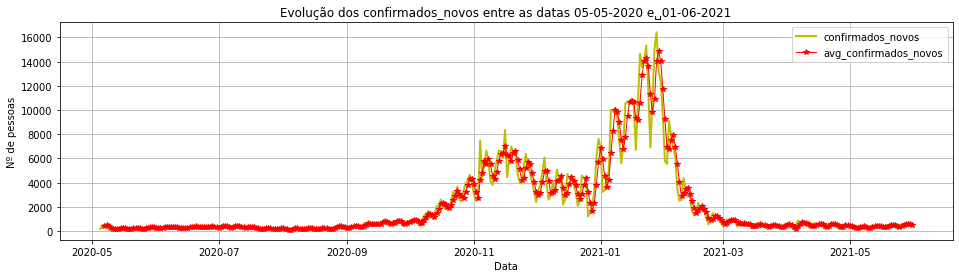

In [74]:
#plot com a média deslizante dos Confirmados_novos
plt.figure(figsize=(16,4))
plt.plot(df['confirmados_novos'],'y',linewidth=2, label='confirmados_novos')
plt.plot(df['avg_confirmados_novos'],'r-*',linewidth=1,label='avg_confirmados_novos')
plt.grid()
plt.title(f'Evolução dos confirmados_novos entre as datas {data_inicio} e␣{data_fim}')
plt.ylabel('Nº de pessoas')
plt.xlabel('Data')
plt.legend()

### Make a Widget version with selection dates and combo box

In [82]:
# função com grafico interativo com combobox
def grafico_widgets(pack):
    data_pack = ['confirmados_novos', 'internados', 'internados_uci']
    data_pack=pack
    plt.figure(figsize=(16,4))
    plt.plot(df[pack],'b--',linewidth=2, label=pack)
    plt.grid()
    plt.title(f'Gráfico de evolução do Covid19 entre as datas {data_inicio} e {data_fim}')
    plt.ylabel('Nº de pessoas')
    plt.xlabel('Data')
    plt.legend()
    plt.show()
    
interact_manual(grafico_widgets, pack=Select(options=['confirmados_novos', 'internados','internados_uci', 'avg_confirmados_novos']))

interactive(children=(Select(description='pack', options=('confirmados_novos', 'internados', 'internados_uci',…

<function __main__.grafico_widgets(pack)>

### Make a summary conclusion

In [86]:
def conclusion(pack):
    data_pack = ['confirmados_novos', 'internados', 'internados_uci']
    data_pack=pack
    max_ =int(df[data_pack].max())
    max_dt= df[data_pack].idxmax()
    min_dt = df[data_pack].idxmin()
    min_ = int(df[data_pack].min())
    med =round(df[data_pack].mean(),2)

    print (f'Entre as datas {data_inicio} e {data_fim} o dia com mais {data_pack} foi no dia {datetime.strftime(max_dt,"%Y-%m-%d")} com {max_} casos.')
    print (f'Entre as datas {data_inicio} e {data_fim} o dia com menos {data_pack} foi no dia {datetime.strftime(min_dt,"%Y-%m-%d")} com {min_} casos.')
    print (f'Entre as datas {data_inicio} e {data_fim} a média de {data_pack} foi de {med} casos')

interact_manual(conclusion, pack=Select(options=['confirmados_novos', 'internados','internados_uci']))

interactive(children=(Select(description='pack', options=('confirmados_novos', 'internados', 'internados_uci')…

<function __main__.conclusion(pack)>